<div style="border:solid green 2px; padding: 20px">
<b>Привет, Сергей!</b>

Меня зовут Александр Пономаренко, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать data science. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Предсказание стоимости жилья

В проекте вам нужно обучить модель линейной регрессии на данных о жилье в Калифорнии в 1990 году. На основе данных нужно предсказать медианную стоимость дома в жилом массиве. Обучите модель и сделайте предсказания на тестовой выборке. Для оценки качества модели используйте метрики RMSE, MAE и R2.

<div class="alert alert-info"> <b>Вопрос 1:</b> Здравствуйте, огромная к вам просьба, просмотрите последовательность действий при обучении модели, мне кажется, я там понапутал всё. В библиотеке spark как-то всё написано абы-как, не понятно как импортировать то, или другое, приходится всё искать в интернете и еще очень много различных вариантов, например LinearRegression, GeneralizedLinearRegressionModel, GeneralizedLinearRegression, pyspark.ml.regression.LinearRegression и другое. Так же и с метриками, я совсем не разобрался, чем их выводить : RegressionEvaluator, RegressionMetrics и др. ПОдскажите хотя бы на что опираться. Честно сказать, я этот spark практически не понял, как и что делается, если есть у вас какая-нибудь литература или еще что-то, где можно посмотреть что и как импортируется, модели обучаются и тд. Спасибо !!!!!!!</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 
    
Вот есть несколько ресурсов, может там сможешь найти, что тебя интересует. Если не найдешь, то будем вместе разбирать
+  https://www.tutorialspoint.com/pyspark/index.htm
+  https://www.guru99.com/pyspark-tutorial.html
+  https://databricks.com/spark/getting-started-with-apache-spark/machine-learning#load-sample-data
 


</div>

<div class="alert alert-info"> <b>Вопрос 1:</b> Проект выполнен не до конца. Анализ результатов я не делал, так как есть подозрения, что я не правильно посчитал метрики </div>

<div class="alert alert-info"> <b>Вопрос 2:</b> Я вам еще оставил несколько вопросов :)) </div>

## Подготовка данных

<div class="alert alert-info"> <b>Спасибо большое за Код-ревью !!! </b> </div>

In [2]:
import pandas as pd 
import numpy as np

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import isnan, when, count, col

from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator
pyspark_version = pyspark.__version__
if int(pyspark_version[:1]) == 3:
    from pyspark.ml.feature import OneHotEncoder    
elif int(pyspark_version[:1]) == 2:
    from pyspark.ml.feature import OneHotEncodeEstimator
        

spark = SparkSession.builder \
                    .master("local") \
                    .appName("Housing in California") \
                    .getOrCreate()

Exception in thread "main" java.nio.file.NoSuchFileException: /tmp/tmpfl6q03ec/connection2076306384977217840.info
	at sun.nio.fs.UnixException.translateToIOException(UnixException.java:86)
	at sun.nio.fs.UnixException.rethrowAsIOException(UnixException.java:102)
	at sun.nio.fs.UnixException.rethrowAsIOException(UnixException.java:107)
	at sun.nio.fs.UnixFileSystemProvider.newByteChannel(UnixFileSystemProvider.java:214)
	at java.nio.file.Files.newByteChannel(Files.java:361)
	at java.nio.file.Files.createFile(Files.java:632)
	at java.nio.file.TempFileHelper.create(TempFileHelper.java:138)
	at java.nio.file.TempFileHelper.createTempFile(TempFileHelper.java:161)
	at java.nio.file.Files.createTempFile(Files.java:852)
	at org.apache.spark.api.python.PythonGatewayServer$.main(PythonGatewayServer.scala:52)
	at org.apache.spark.api.python.PythonGatewayServer.main(PythonGatewayServer.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.i

In [3]:
spark = SparkSession.builder.appName('spark3.2show').getOrCreate()
print('Spark info :')
spark

Spark info :


Используем Spark версии 3.0.2 .  Так же посмотрим на версию Python и выведем версию Spark

In [4]:
print('Version of python: ') 
!python -V
print('Version of pyspark :', pyspark.__version__)

Version of python: 
Python 3.9.5
Version of pyspark : 3.0.2


In [5]:
df = spark.read.option('header', 'true').csv('/datasets/housing.csv', inferSchema = True) 

Импортируем DataFrame 

In [6]:
type(df)

pyspark.sql.dataframe.DataFrame

Убеждаемся, что это датафрейм spark

In [7]:
df.printSchema() 

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- ocean_proximity: string (nullable = true)



<div class="alert alert-info"> <b>Вопрос 1:</b> Попробовал настроить *nullable* чтобы показывал есть пропуски или нет, но что-то не получилось, а в документации особо ничего не указано. Как это сделать ? Чтобы сразу при *.printSchema()* были видны NaN (true или false)</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 
    
Ниже ты корректно находишь пропуски. Тут не настроить, так чтобы были видны пропуски, printSchema() так не умеет
</div>

Все столбцы имеют тип данных **double (float)**, и один столбец тип **string**.

In [8]:
df.show(3)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
only showing top 3 rows



In [9]:
df.count() 

20640

В нашем DataFrame 20640 строк.

<div class="alert alert-info"> <b>Вопрос 1:</b> Как в pyspark посмотреть информацию о df, например как в pandas через info()?. Скажите, правильно ли я работаю с df, просто некоторые студенты переводят в pandas и обрабатывают(понятно, что с большими данными так не получится), но всё же, вот в таком ключе будет идти обработка df в компании? Не очень удобно смотреть на данные в том формате, в котором работает pyspark(пример ниже) </div>

In [10]:
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|        0|       0|                 0|          0|           207|         0|         0|            0|                 0|              0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+



In [11]:
#КОД РЕВЬЮЕРА
df.summary().select(['summary', 'longitude', 'latitude', 'housing_median_age', 'total_rooms']).show()

+-------+-------------------+-----------------+------------------+------------------+
|summary|          longitude|         latitude|housing_median_age|       total_rooms|
+-------+-------------------+-----------------+------------------+------------------+
|  count|              20640|            20640|             20640|             20640|
|   mean|-119.56970445736148| 35.6318614341087|28.639486434108527|2635.7630813953488|
| stddev|  2.003531723502584|2.135952397457101| 12.58555761211163|2181.6152515827944|
|    min|            -124.35|            32.54|               1.0|               2.0|
|    25%|             -121.8|            33.93|              18.0|            1447.0|
|    50%|            -118.49|            34.26|              29.0|            2127.0|
|    75%|            -118.01|            37.71|              37.0|            3146.0|
|    max|            -114.31|            41.95|              52.0|           39320.0|
+-------+-------------------+-----------------+-------

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 
    
Если данных немного, можно и в pandas перевести. В spark нет аналога info(). Есть summary/printSchema
    
    
Скажем так, spark не про красоту;) Он для работы с большими данными 
</div>

In [12]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'longitude': 0,
 'latitude': 0,
 'housing_median_age': 0,
 'total_rooms': 0,
 'total_bedrooms': 207,
 'population': 0,
 'households': 0,
 'median_income': 0,
 'median_house_value': 0,
 'ocean_proximity': 0}

У нас 207 значений в столбце 'total_bedrooms' являются NaN.

<div class="alert alert-info"> <b>Вопрос 1:</b> Скажите, как делать визуализацию в этом pyspark, что-то я попробовал визуализировать столбец total_bedrooms, не получилось. Я пробовал без перевода в *.toPandas()*</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> В каком плане?  Можно сделать вот так:</div>

<div class="alert alert-info"> <b>Вопрос 2:</b> Я имел ввиду графики типа seaborn и т д</div>

<div class="alert alert-success">
<b>Комментарий ревьюера V3✔️:</b> Эх...нет. Придется переводить в pandas и строить </div>

In [13]:
#КОД РЕВЬЮЕРА
df.select('total_bedrooms').show(3)

+--------------+
|total_bedrooms|
+--------------+
|         129.0|
|        1106.0|
|         190.0|
+--------------+
only showing top 3 rows



In [14]:
med2 = df.approxQuantile( "total_bedrooms", [0.5], 0.25)

<div class="alert alert-info"> <b>Вопрос 1:</b> Как я понял, я с помощью кода выше, посчитал медиану столбца total_bedrooms?</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, ты прав. Можно было бы передать вместо 296 переменную med2[0]</div>

In [16]:
df = df.na.fill(med2[0])

<div class="alert alert-info"> <b>Вопрос 2:</b> med2[0] - этим действием мы что делаем, из типа list преобразуем в тип float ? </div>

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> Можно и так сказать, но наверное более правильней будет: берем первым элемент списка:)</div>

In [15]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'longitude': 0,
 'latitude': 0,
 'housing_median_age': 0,
 'total_rooms': 0,
 'total_bedrooms': 0,
 'population': 0,
 'households': 0,
 'median_income': 0,
 'median_house_value': 0,
 'ocean_proximity': 0}

Заменил NaN значения в столбце total_bedrooms на медиану этого столбца.

<div class="alert alert-info"> <b>Вопрос 1:</b> Информации по pyspark довольно-таки мало и документация написана без лишних слов, может есть у вас какие-нибудь интересные ресурсы почитать про pyspark (с примерами кода) ?</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> В самом начале оставил несколько ссылок</div>

## Обучение моделей

### Трансформация категориальных признаков 

In [16]:
df.select([c for c in df.columns if c in ['ocean_proximity']]).show(5)

+---------------+
|ocean_proximity|
+---------------+
|       NEAR BAY|
|       NEAR BAY|
|       NEAR BAY|
|       NEAR BAY|
|       NEAR BAY|
+---------------+
only showing top 5 rows



Тип колонки string 

In [17]:
ocean_proxim = StringIndexer(inputCol="ocean_proximity", outputCol="ocean_proximity_index")
df = ocean_proxim.fit(df).transform(df)

Мы не можем напрямую применять OneHotEncoder к строковым столбцам. Нам нужно сначала преобразовать строковые столбцы в числовое значение. Для этого мы будем использовать StringIndexer. После этого мы можем применить OneHotEncoder.

In [18]:
df.select([c for c in df.columns if c in ['ocean_proximity_index']]).show(5)

+---------------------+
|ocean_proximity_index|
+---------------------+
|                  3.0|
|                  3.0|
|                  3.0|
|                  3.0|
|                  3.0|
+---------------------+
only showing top 5 rows



Проверяем результат

In [19]:
one_hotencoder_1 = OneHotEncoder(dropLast=True, inputCol="ocean_proximity_index", outputCol="ocean_proximity_vec")
df = one_hotencoder_1.fit(df).transform(df)

<div class="alert alert-info"> <b>Вопрос 1:</b> dropLast=False - это что означает, что не удаляем ? Т к до установки этого параметра было (4,[3],[1.0]) - строке, а после того как я установил dropLast=False стало (5,[3],[1.0]). Пример ниже в выводе</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Да, это аналог get_dummies в котором мы указывали drop_first=True. Тут тоже нужно оставить дефолтные настройки</div>

<div class="alert alert-info"> <b>Комментарий 2:</b> Сделал dropLast=True :)</div>

Кодировали признак при помощи OneHotEncoder

In [20]:
df.select([c for c in df.columns if c in ['ocean_proximity_vec']]).show(5)

+-------------------+
|ocean_proximity_vec|
+-------------------+
|      (4,[3],[1.0])|
|      (4,[3],[1.0])|
|      (4,[3],[1.0])|
|      (4,[3],[1.0])|
|      (4,[3],[1.0])|
+-------------------+
only showing top 5 rows



<div class="alert alert-info"> <b>Вопрос 1:</b> Что означают числа в строке (5,[3],[1.0]) ?</div>

In [21]:
#КОД РЕВЬЮЕРА
df.toPandas()[['ocean_proximity', 'ocean_proximity_index', 'ocean_proximity_vec']].sample(7)

,ocean_proximity,ocean_proximity_index,ocean_proximity_vec
17494,NEAR OCEAN,2.0,"(0.0, 0.0, 1.0, 0.0)"
17614,<1H OCEAN,0.0,"(1.0, 0.0, 0.0, 0.0)"
17064,NEAR BAY,3.0,"(0.0, 0.0, 0.0, 1.0)"
1307,INLAND,1.0,"(0.0, 1.0, 0.0, 0.0)"
10578,<1H OCEAN,0.0,"(1.0, 0.0, 0.0, 0.0)"
11678,<1H OCEAN,0.0,"(1.0, 0.0, 0.0, 0.0)"
5760,<1H OCEAN,0.0,"(1.0, 0.0, 0.0, 0.0)"


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 
    
Ввывел специально, чтобы было нагляднее. Смотри первое число `5` отвечает,за размер вектора ocean_proximity_vec (то есть у нас пять уникальных ocean_proximity. `3` это индекс. 
    
    
    
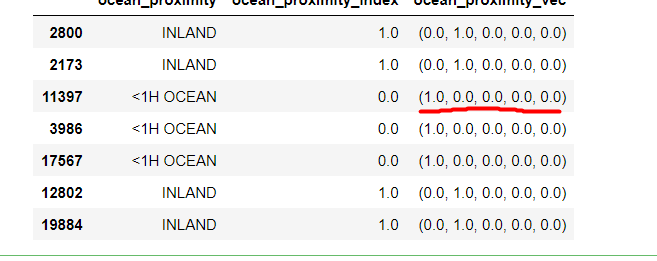
    
Например, индекс вот тут `1`. У них счет начинается с 0.
    
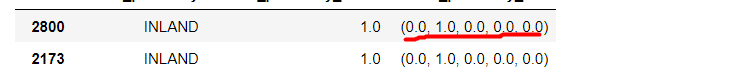
    
А `1.0` просто показывает чем мы кодируем 
</div>

<div class="alert alert-info"> <b>Комментарий 2:</b> Всё, понял, СПАСИБО !!!</div>

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> 😊</div>

Проверяем кодировку столбца

<div class="alert alert-info"> <b>Вопрос 1:</b> Нужно ли делать VectorAssembler для одного столбца ? Хотя в документации VectorAssembler на вход принимает несколько столбцов, а на выходе один. Если всего 1 категориальный столбец, как его обработать ? Точнее чем и нужно ли вообще ?</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> В данном случае нет необходимости, ocean_proximity_vec уже является вектором</div>

<div class="alert alert-info"> <b>Вопрос 2:</b> А как понять, является ли он вектором ?</div>

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> Я ждал этот вопрос:) Если по русски, то spark после любого преоразования уже создает вектор. Ну то есть ты сделал OHE и уже получил столбец векторов:) VectorAssembler нужен только для того, чтобы соединить несколько столбцов в один, как например с numerical_cols;) </div>

In [22]:
categorical_assembler = VectorAssembler(inputCols=['ocean_proximity_vec'],
                                        outputCol="categorical_features")
df = categorical_assembler.transform(df) 

In [23]:
df.show(2)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+-------------------+--------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|ocean_proximity_index|ocean_proximity_vec|categorical_features|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+---------------------+-------------------+--------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|                  3.0|      (4,[3],[1.0])|       (4,[3],[1.0])|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|                  3.0|      (4,[3],[1.0])|       (4,[3],[1.

### Трансформация числовых признаков

In [24]:
numerical_cols = (['longitude', 
                   'latitude', 
                   'housing_median_age', 
                   'total_rooms', 
                   'total_bedrooms',
                   'population',
                   'households',
                   'median_income'])

target = 'median_house_value'                  # Целевой признак

В список записали числовые признаки для дальнейшей трансформации.

In [25]:
numerical_assembler = VectorAssembler(inputCols=numerical_cols,
                                      outputCol="numerical_features")

df = numerical_assembler.transform(df) 

standardScaler = StandardScaler(inputCol='numerical_features',
                                outputCol="numerical_features_scaled")
df = standardScaler.fit(df).transform(df) 

In [26]:
df.printSchema() 

root
 |-- longitude: double (nullable = false)
 |-- latitude: double (nullable = false)
 |-- housing_median_age: double (nullable = false)
 |-- total_rooms: double (nullable = false)
 |-- total_bedrooms: double (nullable = false)
 |-- population: double (nullable = false)
 |-- households: double (nullable = false)
 |-- median_income: double (nullable = false)
 |-- median_house_value: double (nullable = false)
 |-- ocean_proximity: string (nullable = true)
 |-- ocean_proximity_index: double (nullable = false)
 |-- ocean_proximity_vec: vector (nullable = true)
 |-- categorical_features: vector (nullable = true)
 |-- numerical_features: vector (nullable = true)
 |-- numerical_features_scaled: vector (nullable = true)



После всех трансформаций получается такая таблица

<div class="alert alert-info"> <b>Вопрос 1:</b> Подскажите, почему такая разница когда мы в pandas преобразуем столбцы категориальные и количественные (там получается много столбцов), а когда мы через spark делаем, на выходе всего 2 столбца получается ('categorical_features', 'numerical_features_scaled') ?</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Потому что, спарк работает векторами. Обрати внимание, мы соединяем нужные нам столбцы вместе с помощью VectorAssembler, он преобразовывает все наши данные в один вектор </div>

In [27]:
all_features = ['categorical_features', 'numerical_features_scaled']

final_assembler = VectorAssembler(inputCols=all_features, 
                                  outputCol='features') 
df = final_assembler.transform(df)

df.select(all_features).show(3) 


+--------------------+-------------------------+
|categorical_features|numerical_features_scaled|
+--------------------+-------------------------+
|       (4,[3],[1.0])|     [-61.007269596069...|
|       (4,[3],[1.0])|     [-61.002278409814...|
|       (4,[3],[1.0])|     [-61.012260782324...|
+--------------------+-------------------------+
only showing top 3 rows



<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отлично, наши данные готовы;) </div>

Собраем трансформированные категорийные и числовые признаки с помощью VectorAssembler

In [28]:
df.select(['categorical_features', 'numerical_features_scaled', 'features']).show(3)


+--------------------+-------------------------+--------------------+
|categorical_features|numerical_features_scaled|            features|
+--------------------+-------------------------+--------------------+
|       (4,[3],[1.0])|     [-61.007269596069...|[0.0,0.0,0.0,1.0,...|
|       (4,[3],[1.0])|     [-61.002278409814...|[0.0,0.0,0.0,1.0,...|
|       (4,[3],[1.0])|     [-61.012260782324...|[0.0,0.0,0.0,1.0,...|
+--------------------+-------------------------+--------------------+
only showing top 3 rows



<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Если много колонок, то с помощью select можешь выбрать нужное кол-во столбцов и их вывести на экран</div>

<div class="alert alert-info"> <b>Комментарий 2:</b> Я что-то не подумал :)</div>

In [29]:
RANDOM_SEED = 2022
train_data, test_data = df.randomSplit([.8,.2], seed=RANDOM_SEED)
display(train_data.count(), test_data.count()) 


16418

4222

Разделяем наш датасет на две части — выборку для обучения и выборку для тестирования качества модели.
Разделение на выборки в Spark можно сделать с помощью метода randomSplit()


### Обучаем модель используя все данные из файла

<div class="alert alert-info"> <b>Вопрос 1:</b> В документации есть что-то типа такого " pyspark.ml.classification.LogisticRegressionModel(java_model=None) "  - это что означает, что модель для языка Java  используется только и на Python её не использовать ? И еще есть я так понимаю готовые модели что-ли (**pyspark.ml.classification.LogisticRegressionModel или LinearRegressionModel** и др) ?</div>



<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Я как то не сталкивался с LinearRegressionModel(возможно они написаны на Java) и тд. Есть же классические модели LinearRegression/LogisticRegression

</div>

In [30]:
lin_reg = LinearRegression(featuresCol='features', labelCol=target) 

In [31]:
grid_search = ParamGridBuilder() \
    .addGrid(lin_reg.regParam, [0.01, 0.1]) \
    .addGrid(lin_reg.elasticNetParam, [0.5, 1.0]) \
    .build()

Используем ParamGridBuilder для перебора гиперпараметров

In [32]:
evaluator = RegressionEvaluator(predictionCol='prediction',
                                labelCol='median_house_value',
                                metricName='rmse')

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отлично, да, RegressionEvaluator правильно написана;)</div>

<div class="alert alert-info"> <b>Вопрос 1:</b> Правильно ли я в  RegressionEvaluator указал metricName='rmse' которая потом используется в CrossValidator? И я так понимаю, что для R2 и MAE нужно опять делать этот цикл grid_search - evaluator - CrossValidator - best_model - обучение модели, предсказания ?</div>



<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Не надо, вполне достаточно тут одной метрики</div>

<div class="alert alert-info"> <b>Вопрос 2:</b> У нас же CrossValidator подбирается под rmse, получается, что нужно делать одно и тоже еще 2 раза, в RegressionEvaluator в metricName='r2', + цикл с CrossValidator + обучение и так же с MAE. Что бы результаты были более-менее хорошие ??? </div>



<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b>Конечно можно рассмотреть все три случая и разобрать их, но я не думаю, что тут у нас сильно как то параметры изменятся + у нас нет цели достичь какого результат на какой нить метрике. Сделал и так гораздо больше, чем вам давалось, молодец:) </div>

<div class="alert alert-info"> <b>Вопрос 2:</b> Скажите, через что смотреть метрики RegressionEvaluator или RegressionMetrics ??? Есть разница или совсем не важно ? </div>



<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b>абсолютно неважно;)</div>

In [33]:
cv = CrossValidator(estimator=lin_reg,
                    estimatorParamMaps=grid_search,
                    evaluator=evaluator)
cv_model = cv.fit(train_data)

22/04/28 14:23:44 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/04/28 14:23:44 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


<div class="alert alert-info"> <b>Вопрос 1:</b> Скажите, после обучения очень много красных строк, я их переводил в переводчике, но особо не понял что и как. Из-за чего они появились и как этих предупреждений избежать ? Стоит ли именно на эти предупреждения обращать внимание ?</div>



<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Он ругается на regParam = 0.0 Удали его из подбора парметров, краснота должна исчезнуть

Возможно и для elasticNetParam придется удалить    
    
Иногда в этих предупреждениях полезная информация, но зачастую она не мешает дальнейшей работе
</div>

<div class="alert alert-info"> <b>Комментарий 2:</b> Удалил = 0.0</div>



Используем CrossValidator для нахождения лучших гиперпараметров.

In [34]:
best_model = cv_model.bestModel
best_reg_param = best_model._java_obj.getRegParam()
best_elasticnet_param = best_model._java_obj.getElasticNetParam()
best_elasticnet_param

1.0

In [35]:
best_reg_param

0.1

Выводим лучшие гиперпараметры

<div class="alert alert-info"> <b>Вопрос 1:</b> Скажите, тремя строками выше, я вывожу код со значением 1.0 и 0,01. Я как понимаю 1,0 - elasticNetParam и 0,01 - regParam ?</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, все верно:)</div>

In [36]:
lr = LinearRegression(featuresCol='features', 
                      labelCol=target, 
                      regParam=best_reg_param, 
                      elasticNetParam=best_elasticnet_param) 
model = lr.fit(train_data)

Обучаем модель LinearRegression

In [37]:
predictions = model.transform(test_data)
predictedLabes = predictions.select("median_house_value", "prediction")
predictedLabes.show(5) 


+------------------+------------------+
|median_house_value|        prediction|
+------------------+------------------+
|          103600.0|152939.92290328303|
|           50800.0|214910.79095488274|
|           58100.0|142694.09725516802|
|           68400.0|132405.62813236937|
|           72200.0|164438.67100292165|
+------------------+------------------+
only showing top 5 rows



Делаем предсказания и выводим часть результата целевой столбец и предсказанные значения

In [38]:
evaluator = RegressionEvaluator(predictionCol='prediction',
                                labelCol='median_house_value')

RegressionEvaluator по умолчанию в качестве метрики использует среднюю квадратическую ошибку (MSE).

<div class="alert alert-info"> <b>Вопрос 1:</b> Скажите, RegressionEvaluator по умолчанию в качестве метрики использует среднюю квадратическую ошибку (MSE), а нам нужны другие метрики, нужно ли делать еще 2 цикла и устанавливать параметр в RegressionEvaluator - metricName = "r2", "mae", "rmse" или делать так, как я сделал ниже и всё  ?
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> То как сделал ниже, вполне подойдет:)</div>

In [39]:
r2_1 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

In [40]:
mae_1 = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})

In [41]:
rmse_1 = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})

<div class="alert alert-info"> <b>Вопрос 1:</b> Скажите, я правильно вывожу метрики ? В spark что-то я не понял, как их правильно выводить. И ОСОБЕННО ПОСЛЕДОВАТЕЛЬНОСТЬ</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, да, все верно:)</div>

### Обучаем модель используя только числовые переменные, исключив категориальные

<div class="alert alert-info"> <b>Вопрос 1:</b> Нужно ли удалять все столбцы (4шт) или достаточно удалить только categorical_features ? </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Столбцы удалят не нужно, они же тебе не мешают. Тебе просто для обучения понадобится numerical_features_scaled и target
</div>

<div class="alert alert-info"> <b>Комментарий 2:</b> Точно !!! </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Не нужно еще раз переводить в вектор, ведь данный столбец уже и есть вектор:) Лишнее действие


Да и данные не нужно разбивать, мы же их уже разбили. Просто используй столбец numerical_features_scaled для обучения и все
</div>

<div class="alert alert-info"> <b>Комментарий 2:</b> Сделал, как вы сказали :) </div>

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> Отлично:)</div>

In [42]:
lin_reg = LinearRegression(featuresCol='numerical_features_scaled', labelCol=target) 

In [43]:
grid_search = ParamGridBuilder() \
    .addGrid(lin_reg.regParam, [0.01, 0.1]) \
    .addGrid(lin_reg.elasticNetParam, [0.5, 1.0]) \
    .build()

In [44]:
evaluator = RegressionEvaluator(predictionCol='prediction',
                                labelCol='median_house_value',
                                metricName='rmse')

In [45]:
cv = CrossValidator(estimator=lin_reg,
                    estimatorParamMaps=grid_search,
                    evaluator=evaluator)
cv_model = cv.fit(train_data)

In [46]:
best_model = cv_model.bestModel
best_reg_param = best_model._java_obj.getRegParam()
best_elasticnet_param = best_model._java_obj.getElasticNetParam()
best_elasticnet_param

0.5

In [47]:
best_reg_param

0.01

In [48]:
lr = LinearRegression(featuresCol='numerical_features_scaled', 
                      labelCol=target, 
                      regParam=best_reg_param, 
                      elasticNetParam=best_elasticnet_param) 
model = lr.fit(train_data)

In [49]:
predictions = model.transform(test_data)
predictedLabes = predictions.select("median_house_value", "prediction")
predictedLabes.show(5) 

+------------------+------------------+
|median_house_value|        prediction|
+------------------+------------------+
|          103600.0|101296.77003160724|
|           50800.0|183232.23560047522|
|           58100.0|109544.91652085586|
|           68400.0|  80314.5777566433|
|           72200.0|130293.92468634155|
+------------------+------------------+
only showing top 5 rows



In [50]:
evaluator = RegressionEvaluator(predictionCol='prediction',
                                labelCol='median_house_value')

In [51]:
r2_2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

In [52]:
mae_2 = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})

In [53]:
rmse_2 = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})

69224.32369565684

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>
<div class="alert alert-success">Отлично! Критических замечаний нет, доделывай и присылай, я приму работу:)</div>


# Анализ результатов

In [54]:
schema = StructType([StructField("type", StringType())\
                     ,StructField("cat_num_signs", StringType())\
                     ,StructField("num_signs", StringType())])

test_list = [['r2', r2_1, r2_2], 
             ['mae', mae_1, mae_2],
             ['rmse', rmse_1, rmse_2]]

df_3 = spark.createDataFrame(test_list,schema=schema) 
df_3.show()

+----+------------------+------------------+
|type|     cat_num_signs|         num_signs|
+----+------------------+------------------+
|  r2|0.6534198842147974|0.6460557656693573|
| mae| 49907.92036584393| 50906.16412328148|
|rmse| 68500.40222904057| 69224.32369565684|
+----+------------------+------------------+



Из таблицы можно сделать вывод, что результат с категориальным признаком немного лучше, чем без него.

## Вывод

В данном проекте применил библиотеку pyspark для обработки dataframe. Импортировал df, посмотрел на данные. Заполнил пропуски медианой, затем сделал трансформацию категориальных признаком, после числовых признаков. Разбил данные 80% - 20%. Обучил модель LinearRegression на всех данных, после только на числовых признаках. Вывел метрики "r2", "mae" и "rmse". Результат работы такой, модель нужно обучать на категориальных и числовых признаков, т к без категориальных - результат немного хуже.

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>
<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Сергей , получился хороший проект! 
    
Если есть  если есть какие либо вопросы я с удовольствием на них отвечу:) <br> Исправь, пожалуйста, замечания и жду проект на следующую проверку:) 


    
    
    
    
    
    
    
    


Удачи в следующих проектах!!!
    
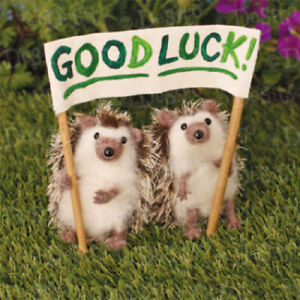

</div>
